## univariate selection

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Selection-techniques/master/train.csv')
data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [50]:
X = data.iloc[:,0:20]
Y = data.iloc[:,-1]

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [52]:
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X,Y)

In [53]:
scores  = pd.DataFrame(fit.scores_)
columns  = pd.DataFrame(X.columns)

In [54]:
featurescores  = pd.concat([columns,scores],axis=1)
featurescores.columns = [" features","scores"]

In [55]:
print(featurescores.nlargest(10,'scores'))

         features         scores
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


## feature importances

In [56]:
from sklearn.tree import ExtraTreeClassifier
import matplotlib.pyplot as plt
model = ExtraTreeClassifier()
model.fit(X,Y)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

In [57]:
print(model.feature_importances_)

[0.05333167 0.02374463 0.03221724 0.02622035 0.02207342 0.01722732
 0.03462276 0.03304444 0.02343888 0.03697233 0.04330441 0.05376562
 0.04482764 0.38098642 0.03055749 0.04284532 0.04058882 0.01863549
 0.01784544 0.02375031]


In [58]:
features = pd.Series(model.feature_importances_,index=X.columns)

In [60]:
features.nlargest(10)

ram              0.380986
px_height        0.053766
battery_power    0.053332
px_width         0.044828
pc               0.043304
sc_w             0.042845
talk_time        0.040589
n_cores          0.036972
int_memory       0.034623
m_dep            0.033044
dtype: float64

## corelation matrix with heatmap

In [61]:
import seaborn as sns

In [65]:
corrmat = data.corr()
top_corr_features = corrmat.index


TypeError: float() argument must be a string or a number, not 'DataFrame'

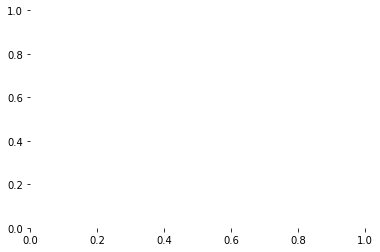

In [67]:
sns.heatmap(data[top_corr_features],data.corr())